In [12]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf
import random

tf.disable_v2_behavior()
print("Num GPUs Available: ", tf.test.is_built_with_cuda())

path="../../data"
IMG_SIZE=100

Num GPUs Available:  False


In [13]:
dog_files=os.listdir(path+'/dogs')
wolf_files=os.listdir(path+'/wolves')
image_paths = []
#label: 0 for dog ,1 for wolf # woof -woof
labels=[]
img=[]
for file in dog_files:
    image = cv2.imread(path+'/'+'dogs/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
    # Creating and saving each image in the form of numerical data in an array
    img.append(image.flatten())
    labels.append([1,0])
    image_paths.append(path+'/'+'dogs/'+file)
for file in wolf_files:
    image = cv2.imread(path+'/'+'wolves/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
    image_paths.append(path+'/'+'wolves/'+file)

    img.append(image.flatten())
    labels.append([0,1])

In [14]:
df={'data':img,'label':labels}
df=pd.DataFrame(df)
df = df.sample(frac=1).reset_index(drop=True)

[0, 1]


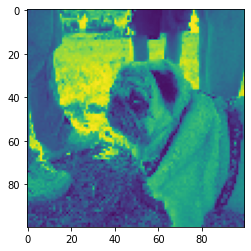

In [15]:
plt.imshow(df.data[0].reshape(IMG_SIZE,IMG_SIZE))
print(df.label[1])
train_df=df[:1400]
val_df=df[1400:1600]
test_df=df[1600:]


In [16]:
x_train=list(train_df.data)
y_train=list(train_df.label)
x_val=list(val_df.data)
y_val=list(val_df.label)
x_test=list(test_df.data)
y_test=list(test_df.label)

In [17]:
X=tf.placeholder(tf.float32,[None,IMG_SIZE*IMG_SIZE])
Y=tf.placeholder(tf.float32,[None,2])
W=tf.Variable(tf.zeros([IMG_SIZE*IMG_SIZE,2]))
b=tf.Variable(tf.zeros([2]))


In [29]:
#h- the hypthosis aka the prediction
h =tf.matmul(X,W)+b
# sigmoid
actv = tf.nn.sigmoid(h)
prediction = tf.argmax(actv,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

loss1=tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=h)
# loss = tf.reduce_mean(loss1)+0.00001*tf.nn.l2_loss(W)
loss = tf.reduce_mean(loss1)
update = tf.train.GradientDescentOptimizer(0.000000005).minimize(loss)



In [30]:
def printGraph(train_loss,test_loss,train_acc,test_acc):
    # print(alphas)
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.title("Loss")
    plt.legend(['train','val'])
    # plt.xlabel(index)
    plt.show()
    plt.plot(train_acc)
    plt.plot(test_acc)
    plt.title("Accuracy")
    plt.legend(['train','val'])
    # plt.xlabel(index)
    plt.show()

 Training accuracy: 0.6171428561, Training loss: 0.6820113659
 Val accuracy: 0.5799999833, Val loss: 0.6824501157
 Training accuracy: 0.6164285541, Training loss: 0.6747714877
 Val accuracy: 0.5849999785, Val loss: 0.6756567359
 Training accuracy: 0.6178571582, Training loss: 0.6699004173
 Val accuracy: 0.5899999738, Val loss: 0.6713907123
 Training accuracy: 0.6185714006, Training loss: 0.6664907336
 Val accuracy: 0.5950000286, Val loss: 0.6686919928
 Training accuracy: 0.6200000048, Training loss: 0.6639946699
 Val accuracy: 0.5899999738, Val loss: 0.6669760346
 Training accuracy: 0.6207143068, Training loss: 0.6620789170
 Val accuracy: 0.5899999738, Val loss: 0.6658833027
 Training accuracy: 0.6207143068, Training loss: 0.6605376601
 Val accuracy: 0.5899999738, Val loss: 0.6651901007
 Training accuracy: 0.6221428514, Training loss: 0.6592425108
 Val accuracy: 0.5950000286, Val loss: 0.6647554636
 Training accuracy: 0.6242856979, Training loss: 0.6581123471
 Val accuracy: 0.595000028

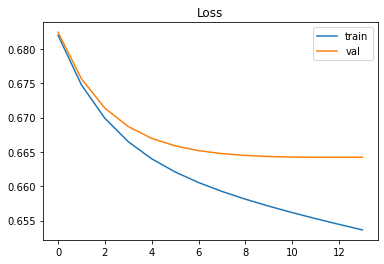

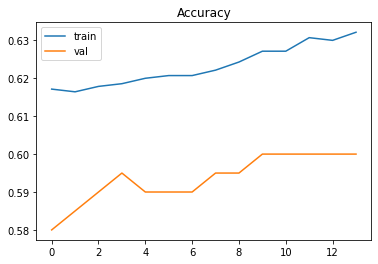

 Val accuracy: 0.6175000072, Val loss: 0.6595146060


In [34]:
max_acc = []
max_acc_v = []
train_loss_arr=[]
val_loss_arr=[]
train_acc_arr=[]
val_acc_arr=[]
ac=[]
ac_v=[]
max_acc = 0 
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for k in range(0,2000):
    curr_index = 0
    # for i in range(0,num_batches):
        # batch_x,batch_y = getBatch(x_train,y_train,i,batch_size)
    if k%100==0 and k!=0:
        #loss_data.append(loss.eval(session= sess, feed_dict = {X:x_train,Y:y_train}))
        train_acc,train_loss = sess.run([accuracy,loss], feed_dict={X:x_train,Y:y_train})
        val_acc,val_loss = sess.run([accuracy,loss], feed_dict={X:x_val,Y:y_val})
        val_acc_arr.append(float(val_acc)) 
        train_acc_arr.append(float(train_acc))
        val_loss_arr.append(float(val_loss))
        train_loss_arr.append(float(train_loss))
        if(max_acc<val_acc):
            max_acc = val_acc
        print (" Training accuracy: %.10f, Training loss: %.10f" % (train_acc, train_loss))
        print (" Val accuracy: %.10f, Val loss: %.10f" % (val_acc, val_loss))
        if k!=100:
            if val_loss_arr[int(k/100)-2]<val_loss_arr[int(k/100)-1] or max_acc-val_acc>0.02 or val_loss-train_loss >0.001:
                print("-------------------break-------------------")
                break
    sess.run([update],feed_dict={X:x_train,Y:y_train})
printGraph(train_loss_arr,val_loss_arr,train_acc_arr,val_acc_arr)
test_acc,test_loss = sess.run([accuracy,loss], feed_dict={X:x_test,Y:y_test})
print (" Val accuracy: %.10f, Val loss: %.10f" % (test_acc, test_loss))



